In [1]:
import sys, json, os

In [2]:
import pandas as pd
import numpy as np

In [3]:
import skimage.io

In [5]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [7]:
#from tensorflow.python.keras.applications import ResNet50
import tensorflow
tensorflow.python.keras.__version__

AttributeError: module 'tensorflow' has no attribute 'python'

In [ ]:
from tensorflow.keras.models import model_from_json, save_model, load_model

In [ ]:
from panda_bvv_config import *


In [8]:
image_sizey = 2000
image_sizex = 1000
model_name = 'model_nowh_size1_to_512'

#### 1. CNN based on ResNet50 ####

In [9]:
resnet_weights_path = 'https://github.com/keras-team/keras-applications/releases/download/resnet/\
resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [10]:
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [12]:
my_new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
train_generator = data_generator.flow_from_directory(
        train_path,
        target_size=(image_sizey, image_sizex),
        batch_size=20,
        class_mode='categorical')



Found 7000 images belonging to 6 classes.


In [14]:
validation_generator = data_generator.flow_from_directory(
        valid_path,
        target_size=(image_sizey, image_sizex),
        batch_size = 20,
        class_mode='categorical')


Found 1500 images belonging to 6 classes.


In [15]:
my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=350,
        epochs = 1,    
        validation_data=validation_generator,
        validation_steps=75)

350/350 [==============================] - 2650s 8s/step - loss: 1.5581 - acc: 0.3793 - val_loss: 2.4658 - val_acc: 0.3100


In [13]:
os.getcwd()

'/kagg/ebsvol/mynote/panda_notes'

In [17]:
#my_new_model.save(os.path.join(base_path, model_name + '.h5'))

In [18]:
os.path.join(base_path, model_name + '.h5')

'/kagg/ebsvol/contest/panda/model_nowh_size1_to_512.h5'

In [18]:
vars(my_new_model.history)

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f184af40048>,
 '_chief_worker_only': None,
 'params': {'batch_size': None,
  'epochs': 10,
  'steps': 200,
  'samples': 200,
  'verbose': 1,
  'do_validation': True,
  'metrics': ['loss', 'acc', 'val_loss', 'val_acc']},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'history': {'loss': [1.644586735367775,
   1.5466400730609893,
   1.4979062801599503,
   1.4660628581047057,
   1.4409797251224519,
   1.4357374441623687,
   1.4071133053302765,
   1.4008751142024993,
   1.3870401287078857,
   1.3678064388036728],
  'acc': [0.33642858,
   0.37114286,
   0.39714286,
   0.41214284,
   0.42314285,
   0.43014285,
   0.444,
   0.43885714,
   0.441,
   0.46],
  'val_loss': [1.9313796877861023,
   1.671687467098236,
   2.031977581977844,
   1.769979498386383,
   1.7399354887008667,
   1.8068025135993957,
   1.7813197135925294,
   1.8860783219337462,
   1.9356785821914673,
   1.9956696939468384],
  'val_acc'

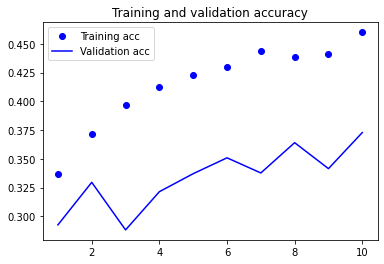

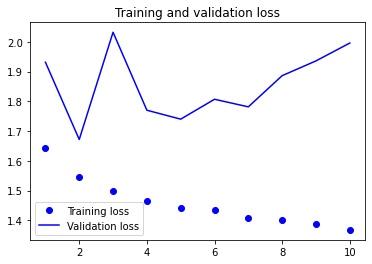

In [19]:
import matplotlib.pyplot as plt
acc = my_new_model.history.history['acc']
val_acc = my_new_model.history.history['val_acc']
loss = my_new_model.history.history['loss']
val_loss = my_new_model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 2. ResNet Model load ####

In [14]:
os.getcwd()

'/kagg/ebsvol/contest/panda'

In [7]:
%%time
rn_model = load_model('/kagg/ebsvol/mynote/panda_notes/panda_very_simple_net_based_on_resnet50.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
CPU times: user 10.2 s, sys: 194 ms, total: 10.4 s
Wall time: 14.2 s


In [15]:
vars(rn_model)

{'_self_setattr_tracking': True,
 '_thread_local': <_thread._local at 0x7f359e068fc0>,
 '_name': 'sequential',
 '_activity_regularizer': None,
 '_trainable': True,
 '_dynamic': False,
 '_is_compiled': True,
 '_layers': [<tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f35d80a6390>,
 '_compute_output_and_mask_jointly': True,
 'supports_masking': False,
 'optimizer': <tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop at 0x7f359cc141d0>,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_losses': [],
 '_callable_losses': [],
 '_metrics': [],
 '_scope': None,
 '_reuse': None,
 '_graph': <tensorflow.python.framework.ops.Graph at 0x7f359e905da0>,
 '_dtype_policy': <Policy "infer", loss_scale=None>,
 '_dtype_defaulted_to_floatx': False,
 '_outbound_nodes': [],
 '_inbound_nodes': [<tensorflow.python.keras.engine.node.Node at 0x7f359e905f60>],
 '_trackable_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f359cc0ce80>,
 '_is_graph_n

In [205]:
#this function is for one image
def ground_truth_isup_grade_image(inp_image, df):
    inp = inp_image.split('.')[0]
    isupg = np.array(df.isup_grade[df.image_id == inp.split('.')[0]])[0]
    return isupg

In [6]:
#this function is for all images
def ground_truth_all_test(test_arr, df):
    labels = []
    for test_name in test_arr:
        inp = test_name.split('.')[0]
        isupg = np.array(df.isup_grade[df.image_id == inp.split('.')[0]])[0]
        labels.append(isupg)
    return labels

In [7]:
#append all test data to one array for .predict
def prepare_test_data(test_arr):
    test_data = []
    for i, test_name in enumerate(test_arr):        
        test_name = test_arr[i]
        test_file = os.path.join('/kagg/ebsvol/contest/panda/test001', test_arr[i])
        biopsy = skimage.io.imread(test_file)
        test_data.append(biopsy)
    return np.array(test_data)

In [8]:
# get overall %% of coincedence
def final_model_review(ground_truth_labels, model_labels):   
    assert len(ground_truth_labels) == len(model_labels),\
                                        "different length for label arrays"    
    return sum(100*np.array(model_labels == ground_truth_labels))//len(ground_truth_labels)/100


In [9]:
os.chdir('/kagg/ebsvol/contest/panda')
df = pd.read_csv('/kagg/ebsvol/contest/panda/train.csv')
df.head(3)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4


In [170]:
df.isup_grade.unique()

array([0, 4, 1, 3, 5, 2])

In [10]:
test_files = os.listdir('/kagg/ebsvol/contest/panda/test001')

In [11]:
%time test_data = prepare_test_data(test_files)

CPU times: user 8.91 s, sys: 1.03 s, total: 9.93 s
Wall time: 14.7 s


In [242]:
len(test_data)

2115

In [250]:
test_data1 = np.array(test_data[:100])

In [251]:
test_data1.shape

(100, 512, 512, 3)

In [249]:
#10 samples
%time ttt_verysmall = rn_model.predict(test_data1)

CPU times: user 18.2 s, sys: 2.54 s, total: 20.7 s
Wall time: 5.42 s


In [252]:
#100 samples
%time ttt_small = rn_model.predict(test_data1)

CPU times: user 3min 1s, sys: 24.5 s, total: 3min 26s
Wall time: 53.9 s


In [17]:
#all samples
%time ttt_all = rn_model.predict(test_data)

CPU times: user 1h 3min 6s, sys: 8min 54s, total: 1h 12min
Wall time: 19min 59s


In [18]:
np.save('first_predict', ttt_all)

In [19]:
final_test_labels = ttt_all.argmax(axis=-1)

In [21]:
final_test_labels.shape

(2115,)

In [24]:
ground_truth_test_labels = ground_truth_all_test(test_files, df)

In [25]:
final_model_review(ground_truth_test_labels, final_test_labels)

0.28

In [29]:
np.array(ground_truth_test_labels).shape

(2115,)

#### 4. Model evaluate ####

In [8]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
test_generator = data_generator.flow_from_directory(
test_path,
target_size=(512, 512),
batch_size=10,
class_mode='categorical')

Found 2115 images belonging to 6 classes.


In [10]:
val_mse, val_mae = rn_model.evaluate_generator(test_generator, steps = 10)

In [11]:
val_mse,

(2.1671913266181946,)

In [12]:
val_mae

0.38

In [14]:
val_mse, val_mae = rn_model.evaluate_generator(test_generator, steps = 10)
val_mae

0.4

In [15]:
label_map = (test_generator.class_indices)

In [16]:
label_map

{'isup0': 0, 'isup1': 1, 'isup2': 2, 'isup3': 3, 'isup4': 4, 'isup5': 5}

In [263]:
#for num_slide in range(10):
#    test_file = os.path.join('/kagg/ebsvol/contest/panda/test001', test_files[num_slide])
#    test_name = test_files[num_slide]
#    biopsy = np.expand_dims(skimage.io.imread(test_file), axis=0)
#    print(num_slide, '-', rn_model.predict(biopsy).argmax(axis=-1)[0])

In [238]:
#np.array(df.isup_grade[df.image_id == test_name.split('.')[0]])[0]
#ground_truth_isup_grade_image(test_name, df)
#biopsy = np.expand_dims(skimage.io.imread(test_file), axis=0)

In [230]:
tt

array([[0.47939873, 0.31160694, 0.14655922, 0.01992637, 0.0167786 ,
        0.02573016]], dtype=float32)

In [231]:
tt.argmax(axis=-1)[0]


0